In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
metrics = ["DenseNet121", "ViT-IN1K", "Swin-IN22K", "Swin-SimMIM"]
models = metrics
latency_values = [137, 742, 769, 769]
auc_values = [0.801, 0.791, 0.753, 0.831]
peak_mem_alloc_values = [3410, 2900, 8095, 8095]
latency_std = [29, 4, 5, 4]  # Standard deviation for latency
peak_mem_res_values = [5207, 13350, 13349, 13350]
# Colors
line_color = '#FFD6E5'
bar_color = '#BAA4C7'

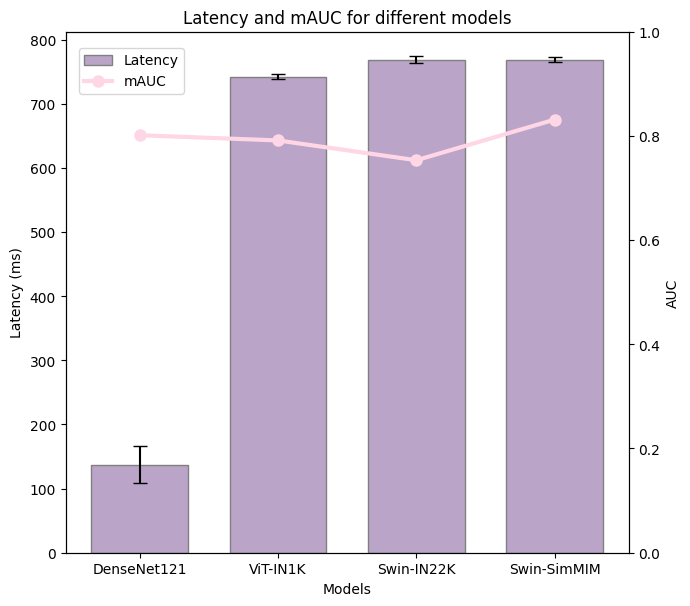

In [117]:
fig, ax1 = plt.subplots(figsize=(7, 6))

bar_width = 0.7
opacity = 1

ax1.set_xlabel('Models')
ax1.set_ylabel('Latency (ms)')
bars = ax1.bar(metrics, latency_values, bar_width, alpha=opacity, color=bar_color, edgecolor='grey',yerr=latency_std, capsize=5, label='Latency')
ax1.tick_params(axis='y')

# Plotting AUC as line
ax2 = ax1.twinx()
ax2.set_ylabel('AUC')
ax2.plot(metrics, auc_values, color=line_color, marker='o', linestyle='-', linewidth=3, markersize=8, label='mAUC')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.11,0.95))

plt.title('Latency and mAUC for different models')
plt.savefig("latency-mauc.png")


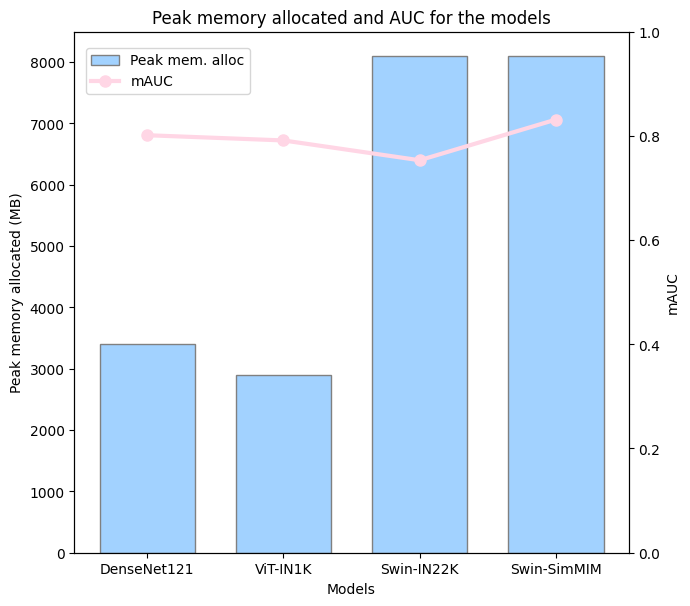

In [114]:
bar_color="#A2D2FF"
fig, ax1 = plt.subplots(figsize=(7, 6))

bar_width = 0.7
opacity = 1

ax1.set_xlabel('Models')
ax1.set_ylabel('Peak memory allocated (MB)')
bars = ax1.bar(metrics, peak_mem_alloc_values, bar_width, alpha=opacity, color=bar_color, edgecolor='grey', label='Peak mem. alloc')
ax1.tick_params(axis='y')

# Plotting AUC as line
ax2 = ax1.twinx()
ax2.set_ylabel('mAUC')
ax2.plot(metrics, auc_values, color=line_color, marker='o', linestyle='-', linewidth=3, markersize=8, label='mAUC')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12,0.95))

plt.title('Peak memory allocated and AUC for the models')
plt.savefig("peak-mem-alloc-auc.png")


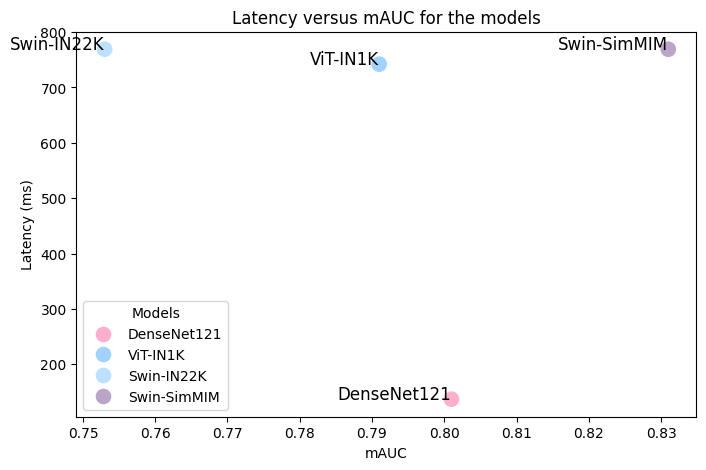

In [64]:
# Colors
colors = ['#FFAFCC', '#A2D2FF', '#BDE0FE', '#BAA4C7']

# Plotting latency against AUC
plt.figure(figsize=(8, 5))

# Scatter plot
sns.scatterplot(x=auc_values, y=latency_values, hue=models, palette=colors, s=150)

# Adding labels for each point
for i, model in enumerate(models):
    plt.text(auc_values[i], latency_values[i], model, fontsize=12, ha='right')

plt.xlabel('mAUC')
plt.ylabel('Latency (ms)')
plt.title('Latency versus mAUC for the models')
plt.legend(title='Models')

plt.savefig("latency-vs-auc.png")

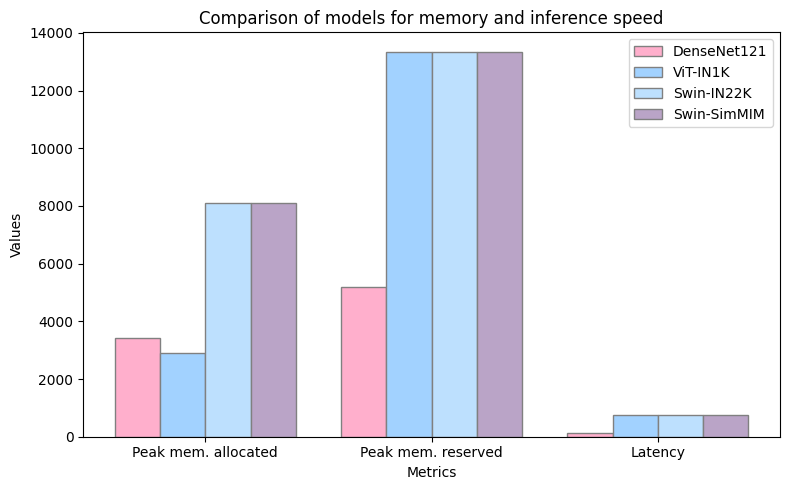

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for the plot
metrics = ["Peak mem. allocated", "Peak mem. reserved", "Latency"]
DenseNet121_values = [3410, 5207, 137]
ViT_IN1K_values = [2900, 13350, 742]
Swin_IN22K_values = [8095, 13349, 769]
Swin_SimMIM_values = [8095, 13350, 769]

# Colors
colors = ['#FFAFCC', '#A2D2FF', '#BDE0FE', '#BAA4C7']
bar_width = 0.2

# Creating the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Set position of bar on X axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the bar plot
ax.bar(r1, DenseNet121_values, color=colors[0], width=bar_width, edgecolor='grey', label='DenseNet121')
ax.bar(r2, ViT_IN1K_values, color=colors[1], width=bar_width, edgecolor='grey', label='ViT-IN1K')
ax.bar(r3, Swin_IN22K_values, color=colors[2], width=bar_width, edgecolor='grey', label='Swin-IN22K')
ax.bar(r4, Swin_SimMIM_values, color=colors[3], width=bar_width, edgecolor='grey', label='Swin-SimMIM')

# Add labels
ax.set_xlabel('Metrics')
ax.set_xticks([r + 1.5 * bar_width for r in range(len(metrics))])
ax.set_xticklabels(metrics)
ax.set_ylabel('Values')
ax.set_title('Comparison of models for memory and inference speed')

# Create legend
ax.legend()

plt.tight_layout()
plt.savefig("speed-memory-comparison.png")
